In [ ]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

from astropy.io import fits
from astropy.table import Table

plt.rcParams.update({
    'font.family': 'serif',
    'font.size': 24,
    'axes.labelsize': 'large',
    'mathtext.fontset': 'stix'
})

from mpdg_som import SelfOrganizingMap
from mpdg_som_utils import SOM_LearningRateFunctions

import mpdg_som_utils

In [ ]:
#load in data produced in primary_targeting_region.ipynb
cut_data_file = '/data2/lsajkov/mpdg/data_products/GAMA/GAMA_primtarg_snr100_lms6_12_25jun2024.fits'

with fits.open(cut_data_file) as cat:
    GAMA_vect_data = Table(cat[1].data)

GAMA_vect_data.add_column(GAMA_vect_data['r_mag_err'], index = 4, name = 'surf_bright_r_err')

In [ ]:
SOM = SelfOrganizingMap([16, 16],
                        initialization = 'random')

In [ ]:
SOM.load_data(GAMA_vect_data['r_mag', 'gr_color', 'surf_bright_r'],
              variable_names = ['r_mag', 'gr_color', 'surf_bright_r'])

In [ ]:
SOM.load_standard_deviations(GAMA_vect_data['r_mag_err', 'gr_color_err', 'surf_bright_r_err'])

In [ ]:
SOM.build_SOM()

In [ ]:
fig = plt.figure()
for i, name in enumerate(SOM.variable_names):
    ax = fig.add_subplot(1, 3, i + 1)
    ax.imshow(SOM.SOM[:, :, i], origin = 'lower', cmap = 'Spectral')
    ax.set_title(SOM.variable_names[i],
                 fontsize = 12)
    ax.axis('off')

In [ ]:
random_idx = np.random.rand(*SOM.mapsize) * SOM.data_len
random_idx = np.array(random_idx, dtype = int)

In [ ]:
weight_vectors = SOM.data[random_idx]

In [ ]:
distances = np.full(SOM.mapsize, np.nan)
iteration_map = np.nditer(distances, flags = ['multi_index'])

for _ in iteration_map:
    chi_sq_dist = mpdg_som_utils.chi_sq_dist(weight_vectors[*iteration_map.multi_index],
                                             SOM.data[45],
                                             data_dim = 3)
    distances[*iteration_map.multi_index] = chi_sq_dist


argmin_idx = np.argmin(distances)
argmin_coords = np.unravel_index(argmin_idx, SOM.mapsize)

In [ ]:
np.shape(weight_vectors)[:-1]

In [ ]:
distances = np.full(SOM.mapsize, np.nan)
iteration_map = np.nditer(distances, flags = ['multi_index'])

for _ in iteration_map:
    euclid_dist = np.linalg.norm(np.array(argmin_coords) -\
                                 np.array(iteration_map.multi_index))
    distances[*iteration_map.multi_index] = euclid_dist

In [ ]:
argmin_coords

In [ ]:
plt.imshow(np.exp(-distances**2/3))

In [ ]:
count = 0
for i, _ in enumerate(np.shape(n_dim_map)):
    for ii in range(np.shape(n_dim_map)[i]):
        count += 1
        print(count)

In [ ]:
[mpdg_som_utils.chi_sq_dist(weight_vector = weight_vectors[ii, jj],
                           data_vector = SOM.data[0],
                           data_dim = 3) for ii in ]
mpdg_som_utils.chi_sq_dist(weight_vector = weight_vectors,
                           data_vector = SOM.data[0],
                           data_dim = 3)

In [ ]:
if (~use_covariance) & (data_dim is not None):
    covar_matrix = np.diagflat([1] * data_dim)

elif (~use_covariance) & (data_dim is None):
    raise(ValueError('Please pass a dimensionality for the data (number of variables).'))

elif (use_covariance) & (covar_vector is None):
    raise(ValueError('There is no covariance matrix for the given data vector!'))

covar_matrix = np.diagflat(covar_vector)
inv_covar_matrix = linalg.inv(covar_matrix)

vector_difference = data_vector - weight_vector

np.dot(np.dot(vector_difference, inv_covar_matrix),vector_difference)

In [ ]:
for i in np.nditer

In [ ]:
plt.imshow(np.ones(SOM.mapsize))

___

In [ ]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

from astropy.io import fits
from astropy.table import Table

from mpdg_som import SelfOrganizingMap
from mpdg_som_utils import SOM_LearningRateFunctions

import mpdg_som_utils
#load in data produced in primary_targeting_region.ipynb
cut_data_file = '/data2/lsajkov/mpdg/data_products/GAMA/GAMA_primtarg_snr100_lms6_12_25jun2024.fits'

with fits.open(cut_data_file) as cat:
    GAMA_vect_data = Table(cat[1].data)

GAMA_vect_data = GAMA_vect_data[GAMA_vect_data['log_stellar_mass'] < 9.5]

GAMA_vect_data.add_column(GAMA_vect_data['r_mag_err'], index = 4, name = 'surf_bright_r_err')
SOM = SelfOrganizingMap([16, 16],
                        initialization = 'random')
SOM.load_data(GAMA_vect_data['r_mag', 'gr_color', 'surf_bright_r'],
              variable_names = ['r_mag', 'gr_color', 'surf_bright_r'])
SOM.load_standard_deviations(GAMA_vect_data['r_mag_err', 'gr_color_err', 'surf_bright_r_err'])
SOM.build_SOM()
random_idx = np.random.rand(*SOM.mapsize) * SOM.data_len
random_idx = np.array(random_idx, dtype = int)
weight_vectors = SOM.data[random_idx]

In [ ]:
step0_weights = weight_vectors.copy()

In [ ]:
step = 1
step1_weights = mpdg_som_utils.training_step(step0_weights,
                                             SOM.data[0],
                                             SOM.variances[0],
                                             step,
                                             mpdg_som_utils.SOM_LearningRateFunctions.power_law_lrf,
                                             (1000, 0.5),
                                             mpdg_som_utils.SOM_NeighborhoodFunctions.gaussian_nbh,
                                             (SOM.mapsize, 2))


In [ ]:
step = 1
step1_weights = step0_weights
for index in range(SOM.data_len):
    step1_weights = mpdg_som_utils.training_step(step1_weights,
                                                 SOM.data[index],
                                                 SOM.variances[index],
                                                 step,
                                                 mpdg_som_utils.SOM_LearningRateFunctions.power_law_lrf,
                                                 (1000, 0.5),
                                                 mpdg_som_utils.SOM_NeighborhoodFunctions.gaussian_nbh,
                                                 (SOM.mapsize, 2))

In [ ]:
fig = plt.figure()
for i, name in enumerate(SOM.variable_names):
    ax = fig.add_subplot(1, 3, i + 1)
    ax.imshow(step0_weights[:, :, i], origin = 'lower', cmap = 'Spectral')
    ax.set_title(SOM.variable_names[i],
                 fontsize = 12)
    ax.axis('off')

In [ ]:
fig = plt.figure()
for i, name in enumerate(SOM.variable_names):
    ax = fig.add_subplot(1, 3, i + 1)
    ax.imshow(step1_weights[:, :, i], origin = 'lower', cmap = 'Spectral')
    ax.set_title(SOM.variable_names[i],
                 fontsize = 12)
    ax.axis('off')

In [ ]:
np.max(step1_weights - step0_weights)

___

In [ ]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

from astropy.io import fits
from astropy.table import Table

from mpdg_som import SelfOrganizingMap

In [ ]:
#load in data produced in primary_targeting_region.ipynb
cut_data_file = '/data2/lsajkov/mpdg/data_products/GAMA/GAMA_primtarg_snr100_lms6_12_25jun2024.fits'

with fits.open(cut_data_file) as cat:
    GAMA_vect_data = Table(cat[1].data)

GAMA_vect_data = GAMA_vect_data[GAMA_vect_data['log_stellar_mass'] < 9.5]

GAMA_vect_data.add_column(GAMA_vect_data['r_mag_err'], index = 4, name = 'surf_bright_r_err')

In [ ]:
input_data = GAMA_vect_data['r_mag', 'gr_color', 'surf_bright_r']
input_vars = GAMA_vect_data['r_mag_err', 'gr_color_err', 'surf_bright_r_err']

input_labels = GAMA_vect_data['log_stellar_mass', 'redshift']

tuple_labels = input_labels.as_array()
list_labels = [list(values) for values in tuple_labels]
input_labels = np.array(list_labels)

In [ ]:
normalization_params = {}

for variable in input_data.keys():
    normalization_params[variable] = {}

    normalization_params[variable]['mean'] = np.mean(GAMA_vect_data[variable])
    normalization_params[variable]['std']  = np.std(GAMA_vect_data[variable])

In [ ]:
normalized_input_data = input_data.copy()
for variable in input_data.keys():
    
    normalized_input_data[variable] -= normalization_params[variable]['mean']
    normalized_input_data[variable] /= normalization_params[variable]['std']

In [ ]:
SOM = SelfOrganizingMap([16, 16],
                        initialization = 'pca',
                        maximum_steps = 100)

data_cut = 1000

SOM.load_data(normalized_input_data[:data_cut],
              variable_names = ['r_mag', 'gr_color', 'surf_bright_r'])

SOM.load_standard_deviations(input_vars[:data_cut])

SOM.build_SOM()

In [ ]:
SOM.data_statistics()
SOM.show_map()

In [ ]:
SOM.train(debug_max_steps = 1,
          error_thresh = 1)

In [ ]:
SOM.show_map()

In [ ]:
SOM.label_map(input_labels[:data_cut],
              parameter_names = ['log_mstar', 'redshift'])

In [ ]:
print(f'| SOM after training. Step {SOM.step}.')
fig = plt.figure(figsize = (10, 10), constrained_layout = True)
for i, name in enumerate(SOM.parameter_names):
    ax = fig.add_subplot(1, 3, i + 1)
    imsh = ax.imshow(SOM.map_labels[..., i], origin = 'lower', cmap = 'jet')
    # ax.set_title(SOM.variable_names[i],
    #              fontsize = 12)
    ax.axis('off')
    
    fig.colorbar(mappable = imsh, ax = ax,
                 label = SOM.parameter_names[i], location = 'bottom',
                 pad = 0.01)

In [ ]:
som_output = np.array([SOM.map_labels[*idx] for idx in SOM.bmu_indices])

In [ ]:
z_outlier_vals = np.abs(som_output[:, 1] - input_labels[:, 1][:data_cut])/(1 + input_labels[:, 1][:data_cut])
z_outlier_frac = np.sum(z_outlier_vals > 0.15)/len(z_outlier_vals)

In [ ]:
z_outlier_frac

In [ ]:
log_mstar = np.median(np.abs(som_output[:, 0] - input_labels[:data_cut, 0]))

In [ ]:
log_mstar_mad, z_mad = np.median(np.abs(som_output - input_labels[:data_cut]), axis = 0)

In [ ]:
fig = plt.figure(figsize = (10, 11), constrained_layout = True)
ax = fig.add_subplot()

hb = ax.hexbin(input_labels[..., 0][:data_cut],
               som_output[..., 0],
               mincnt = 1, cmap = 'jet')

fig.colorbar(mappable = hb, ax = ax,
             location = 'top', pad = 0, label = '$N_{\mathrm{galaxies}}$')

ax.set_xlim(8, 9.6)
ax.set_ylim(8, 9.6)

ax.set_xlabel('GAMA log$_{10}(M_*/M_{\odot})$\nTrue')
ax.set_ylabel('Predicted\nSOM log$_{10}(M_*/M_{\odot})$')

ax.axline([0, 0], slope = 1, color = 'red')
ax.text(0.65, 0.01,
       f'MAD: {log_mstar_mad:.3f} dex',
       ma = 'right',
       transform = ax.transAxes)

In [ ]:
fig = plt.figure(figsize = (10, 11), constrained_layout = True)
ax = fig.add_subplot()

hb = ax.hexbin(input_labels[..., 1][:data_cut],
               som_output[..., 1],
               mincnt = 1, cmap = 'jet')

fig.colorbar(mappable = hb, ax = ax,
             location = 'top', pad = 0.02, label = '$N_{\mathrm{galaxies}}$')

ax.set_xlim(0, 0.26)
ax.set_ylim(0, 0.26)

ax.set_xlabel('GAMA $z$\nTrue')
ax.set_ylabel('Predicted\nSOM $z$')

ax.axline([0, 0], slope = 1, color = 'red')
ax.text(0.65, 0.01,
       f'MAD: {z_mad:.3f} dex',
       ma = 'right',
       transform = ax.transAxes)

In [ ]:
np.shape(SOM.map_labels)

In [ ]:
populated_cells = np.unique(SOM.bmu_indices, axis = 0)

In [ ]:
np.all(SOM.bmu_indices == (populated_cells[33]), axis = -1)

In [ ]:
np.equal(SOM.bmu_indices, populated_cells[33],
         )

In [ ]:
plt.imshow(SOM.map_labels[..., 0])

In [ ]:
plt.scatter(populated_cells[:, 0], populated_cells[:, 1])

In [ ]:
SOM.bmu_indices

In [ ]:
np.sum(SOM.bmu_indices == [5, 3], axis = -1) == 2

In [ ]:
populated_cells[0]

In [ ]:
matching_idx

In [ ]:
(SOM.map_labels)

In [ ]:
SOM.map_labels[*populated_cells[0]]

In [ ]:
populated_cells[0]

In [ ]:
for cell in populated_cells:
    print(cell)

In [ ]:
(SOM.parameters)

___

Build mapping function

In [ ]:
idx = SOM.bmu_indices.copy()

In [ ]:
fig = plt.figure(figsize = (5, 5))
ax = fig.add_subplot()

ax.scatter(idx[..., 0], idx[..., 1])
ax.axis('off')

In [ ]:
populated_cells = np.unique(idx, axis = 0)

In [ ]:
parameters = input_labels
tuple_params = parameters.as_array()
list_params = [list(values) for values in tuple_params]
parameters = np.array(list_params)

In [ ]:
np.median(parameters, axis = 0)

In [ ]:
np.median(parameters[:, 0])

In [ ]:
np.median(input_labels[:10], axis = 0)

In [ ]:
len(matching_idx)

In [ ]:
sum_of_cells = 0
for cell in populated_cells:
    print(cell)
    matching_idx = np.sum(idx == cell, axis = -1) == SOM.map_dimensionality
    

___

Build error estimator

In [ ]:
fig = plt.figure(figsize = (12, 10))
ax = fig.add_subplot()

hb = ax.hexbin(bmu_idx[:, 0], bmu_idx[:, 1], gridsize = [16, 8])
fig.colorbar(mappable = hb, label = 'datapoints')

In [ ]:
weight_vectors = SOM.weights_map.copy()

In [ ]:
max_quant_error = 0
for index in range(SOM.data_len):
    quant_error = np.dot(SOM.data[index], SOM.weights_map[*SOM.bmu_indices[index], :])
    if quant_error > max_quant_error: max_quant_error = quant_error

In [ ]:
quant_error

In [ ]:
SOM.bmu_indices[0]

In [ ]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

from astropy.io import fits
from astropy.table import Table

from mpdg_som import SelfOrganizingMap
#load in data produced in primary_targeting_region.ipynb
cut_data_file = '/data2/lsajkov/mpdg/data_products/GAMA/GAMA_primtarg_snr100_lms6_12_25jun2024.fits'

with fits.open(cut_data_file) as cat:
    GAMA_vect_data = Table(cat[1].data)

GAMA_vect_data = GAMA_vect_data[GAMA_vect_data['log_stellar_mass'] < 9.5]

GAMA_vect_data.add_column(GAMA_vect_data['r_mag_err'], index = 4, name = 'surf_bright_r_err')
input_data = GAMA_vect_data['r_mag', 'gr_color', 'surf_bright_r']
input_vars = GAMA_vect_data['r_mag_err', 'gr_color_err', 'surf_bright_r_err']

input_labels = GAMA_vect_data['log_stellar_mass', 'redshift']

tuple_labels = input_labels.as_array()
list_labels = [list(values) for values in tuple_labels]
input_labels = np.array(list_labels)

normalization_params = {}

for variable in input_data.keys():
    normalization_params[variable] = {}

    normalization_params[variable]['mean'] = np.mean(GAMA_vect_data[variable])
    normalization_params[variable]['std']  = np.std(GAMA_vect_data[variable])

normalized_input_data = input_data.copy()
for variable in input_data.keys():
    
    normalized_input_data[variable] -= normalization_params[variable]['mean']
    normalized_input_data[variable] /= normalization_params[variable]['std']

SOM = SelfOrganizingMap(mapsize = [16, 16])

data_cut = 1000

SOM.load_data(normalized_input_data[:data_cut],
              variable_names = ['r_mag', 'gr_color', 'surf_bright_r'])

SOM.load_standard_deviations(input_vars[:data_cut])

SOM.build_SOM()

In [ ]:
def quantization_error(weight_vectors,
                        data,
                        bmu_indices):
    
    quantization_errors = np.full_like(data, np.nan)
    for index in range(len(data)):
        bmu_index = bmu_indices[index]
        data_vector = data[index]
        misalignment = weight_vectors[*bmu_index, :] - data_vector
        quantization_errors[index] = np.linalg.norm(misalignment)
        
    rms_quantization_errors = np.sqrt(np.sum(quantization_errors**2))
    return rms_quantization_errors


In [ ]:
quantization_error(SOM.weights_map,
                   SOM.data,
                   SOM.bmu_indices)

In [ ]:
np.hypot(1, 2, 3)

___

Build shuffler

In [3]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

from astropy.io import fits
from astropy.table import Table

from mpdg_som import SelfOrganizingMap
#load in data produced in primary_targeting_region.ipynb
cut_data_file = '/data2/lsajkov/mpdg/data_products/GAMA/GAMA_primtarg_snr100_lms6_12_25jun2024.fits'

with fits.open(cut_data_file) as cat:
    GAMA_vect_data = Table(cat[1].data)

GAMA_vect_data = GAMA_vect_data[GAMA_vect_data['log_stellar_mass'] < 9.5]

GAMA_vect_data.add_column(GAMA_vect_data['r_mag_err'], index = 4, name = 'surf_bright_r_err')
input_data = GAMA_vect_data['r_mag', 'gr_color', 'surf_bright_r']
input_vars = GAMA_vect_data['r_mag_err', 'gr_color_err', 'surf_bright_r_err']

input_labels = GAMA_vect_data['r_mag', 'gr_color', 'surf_bright_r', 'log_stellar_mass', 'redshift']

tuple_labels = input_labels.as_array()
list_labels = [list(values) for values in tuple_labels]
input_labels = np.array(list_labels)

normalization_params = {}

for variable in input_data.keys():
    normalization_params[variable] = {}

    normalization_params[variable]['mean'] = np.mean(GAMA_vect_data[variable])
    normalization_params[variable]['std']  = np.std(GAMA_vect_data[variable])

normalized_input_data = input_data.copy()
for variable in input_data.keys():
    
    normalized_input_data[variable] -= normalization_params[variable]['mean']
    normalized_input_data[variable] /= normalization_params[variable]['std']

SOM = SelfOrganizingMap(mapsize = [16, 16])

data_cut = 1000

SOM.load_data(normalized_input_data[:data_cut],
              variable_names = ['r_mag', 'gr_color', 'surf_bright_r'])

SOM.load_standard_deviations(input_vars[:data_cut])

SOM.build_SOM()

___

Build better labeling functions

In [ ]:
labeled_data_bmu_idx = {}

i = 0; j = 0
for index in range(SOM.data_len):

    bmu_coords = [i%20, j%20]
    if f'{bmu_coords}' in labeled_data_bmu_idx.keys():
        labeled_data_bmu_idx[f'{bmu_coords}'].append(index)
    else:
        labeled_data_bmu_idx[f'{bmu_coords}'] = []
        labeled_data_bmu_idx[f'{bmu_coords}'].append(index)

    i += 1; j += 1

In [ ]:
iteration_map = np.nditer(SOM.weights_map[..., 0], flags = ['multi_index'])

for _ in iteration_map:

    index = list(iteration_map.multi_index)

    if f'{index}' in labeled_data_bmu_idx.keys():
        local_vectors = 

In [6]:
SOM.label_map(input_labels)

In [9]:
from mpdg_som_utils import find_bmu_coords

In [11]:


unitary_covar_vector = [1] * SOM.data_dim

labeled_data_bmu_idx = {}
for index in range(SOM.labeled_data_len):

    bmu_coords = find_bmu_coords(SOM.weights_map,
                                SOM.labeled_data[index, :SOM.data_dim],
                                unitary_covar_vector)
        
    if f'{bmu_coords}' in labeled_data_bmu_idx.keys():
        labeled_data_bmu_idx[f'{bmu_coords}'].append(index)
    else:
        labeled_data_bmu_idx[f'{bmu_coords}'] = []
        labeled_data_bmu_idx[f'{bmu_coords}'].append(index)

    # self.map_labels = np.full([*self.mapsize, self.params_dim], np.nan)
    
    # iteration_map = np.nditer(self.map_labels[..., 0], flags = ['multi_index'])

    # for _ in iteration_map:
        
    #     index = list(iteration_map.multi_index)

    #     if f'{index}' in labeled_data_bmu_idx.keys():
    #         local_vectors = self.labeled_data[labeled_data_bmu_idx[f'{index}']]
    #         self.map_labels[*index] = np.nanmedian(local_vectors, axis = 0)


In [37]:
SOM.map_labels = np.full([*SOM.mapsize, SOM.params_dim], np.nan)

iteration_map = np.nditer(SOM.map_labels[..., 0], flags = ['multi_index'])

for _ in iteration_map:
    
    index = iteration_map.multi_index

    if f'{index}' in labeled_data_bmu_idx.keys():
        local_vectors = SOM.labeled_data[labeled_data_bmu_idx[f'{index}']]
        SOM.map_labels[*index] = np.nanmedian(local_vectors[:, -SOM.params_dim:], axis = 0)

In [39]:
np.sum(~np.isnan(SOM.map_labels))

10

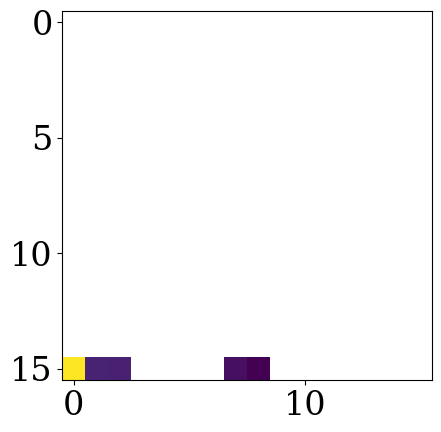

In [41]:
plt.imshow(SOM.map_labels[..., 1])

___

Test Optuna

In [1]:
import optuna

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [9]:
def ObjectiveFunction(trial):

    x = trial.suggest_float('x', -10, 10)

    return (x - 2)**2

In [10]:
study = optuna.create_study(study_name = 'test',
                            direction = 'minimize')

[I 2024-07-02 21:35:56,453] A new study created in memory with name: test


In [17]:
trial_no = []

In [25]:
def dump_to_file(study, frozen_trial):

    ft = frozen_trial
    with open(log_file, 'a') as log:
        log.write(f'{ft.number}\t{ft.value:3f}\t{ft.params}\n')

In [26]:
log_file = '/Users/leo/Desktop/test_log'
with open(log_file, 'w') as log:
    log.write('Trial number\tError value\tParams\n')

study.optimize(ObjectiveFunction, n_trials = 50,
               callbacks = [dump_to_file])

[I 2024-07-02 21:39:46,360] Trial 100 finished with value: 6.805237721489455 and parameters: {'x': -0.608685056017582}. Best is trial 42 with value: 1.8142930688825113e-05.
[I 2024-07-02 21:39:46,367] Trial 101 finished with value: 0.026639001072017332 and parameters: {'x': 2.1632145859658913}. Best is trial 42 with value: 1.8142930688825113e-05.
[I 2024-07-02 21:39:46,372] Trial 102 finished with value: 0.008244244316263938 and parameters: {'x': 1.9092021789013418}. Best is trial 42 with value: 1.8142930688825113e-05.
[I 2024-07-02 21:39:46,376] Trial 103 finished with value: 2.1275017481497582 and parameters: {'x': 0.5414041861606218}. Best is trial 42 with value: 1.8142930688825113e-05.
[I 2024-07-02 21:39:46,380] Trial 104 finished with value: 0.4460564964436549 and parameters: {'x': 1.3321253886816367}. Best is trial 42 with value: 1.8142930688825113e-05.
[I 2024-07-02 21:39:46,385] Trial 105 finished with value: 0.252728414774878 and parameters: {'x': 2.502721010874698}. Best is 